<a href="https://colab.research.google.com/github/maxidiazbattan/covid-vaccination-latinamerica/blob/main/covid_vaccinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import io
import json

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Set standard notation instead scientific

In [20]:
# Downloading the csv file from the OWID GitHub account
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [21]:
# Downloading the csv file with the latitude and longitude of the world countries for a future choropleth map
lat_long = pd.read_html ('https://developers.google.com/public-data/docs/canonical/countries_csv')

In [22]:
# Changing the lat_long list into a numpy array and reshaping it
lat_long = np.array(lat_long)
lat_long = lat_long.reshape(-1, 4)

In [23]:
# Changing the lat_long array into a pandas dataframe 
df_lat_long = pd.DataFrame(lat_long, columns = ['country', 'latitude', 'longitude', 'location'])

In [24]:
# Changing the date format into datetime
df['date'] = pd.to_datetime (df['date'])

In [25]:
df.set_index('date', inplace = True)

In [26]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

In [27]:
df.columns

Index(['location', 'iso_code', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'day', 'month', 'year'],
      dtype='object')

In [28]:
columns = [ 'location', 'iso_code', 'day', 'month', 'year', 
            'total_vaccinations', 'people_vaccinated',
            'people_fully_vaccinated', 'daily_vaccinations_raw',
            'daily_vaccinations', 'total_vaccinations_per_hundred',
            'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
            'daily_vaccinations_per_million']

In [30]:
df = df[columns]
df.head()

,location,iso_code,day,month,year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,22,2,2021,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan
2021-02-23,Afghanistan,AFG,23,2,2021,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00
2021-02-24,Afghanistan,AFG,24,2,2021,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00
2021-02-25,Afghanistan,AFG,25,2,2021,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00
2021-02-26,Afghanistan,AFG,26,2,2021,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00


In [33]:
# Grouping countries by location
df_loc = df.groupby('location', as_index = False).mean()

In [34]:
df_loc.sample(5)

,location,day,month,year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
186,Slovakia,15.34,3.70,2021.00,1396592.97,909200.64,527063.80,20736.15,20445.59,25.58,16.65,9.65,3744.85
73,France,15.57,3.84,2020.97,18219275.16,12542730.34,6466622.08,302734.93,294320.09,26.97,18.56,9.57,4356.16
185,Sint Maarten (Dutch part),16.54,5.60,2021.00,31902.00,18238.67,13663.33,nan,267.11,74.40,42.53,31.86,6228.91
133,Monaco,15.68,3.62,2020.99,23593.27,14672.23,12366.15,nan,206.17,60.12,37.39,31.51,5253.65
2,Albania,15.64,3.79,2021.00,452209.75,371803.82,287613.18,8504.92,5560.68,15.71,12.92,9.99,1932.20


In [35]:
la_countries = ['Argentina', 'Brazil', 'Bolivia', 'Chile', 'Colombia', 'Uruguay', 'Paraguay', 'Peru', 'Ecuador', 'Mexico']

In [37]:
# Checking if the countries on la_countries list, are present in the dataframe by a simple list comprehension
[country for country in df_loc['location'] if country in la_countries] 

['Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Mexico',
 'Paraguay',
 'Peru',
 'Uruguay']

In [39]:
df_la = df[df['location'].isin(la_countries)]
df_la.sample(5)

,location,iso_code,day,month,year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,,,,,,
2021-07-01,Ecuador,ECU,1,7,2021,4301966.00,2885050.00,1416916.00,79378.00,60342.00,24.38,16.35,8.03,3420.00
2021-04-23,Argentina,ARG,23,4,2021,6807411.00,5955371.00,852040.00,113973.00,102056.00,15.06,13.18,1.89,2258.00
2021-02-01,Argentina,ARG,1,2,2021,375851.00,281577.00,94274.00,nan,11924.00,0.83,0.62,0.21,264.00
2021-03-14,Uruguay,URY,14,3,2021,203282.00,203282.00,nan,1.00,18668.00,5.85,5.85,nan,5374.00
2021-05-19,Brazil,BRA,19,5,2021,55098913.00,37376193.00,17722720.00,766673.00,844329.00,25.92,17.58,8.34,3972.00


In [40]:
df_lat_long[df_lat_long['location'].isin(la_countries)]

,country,latitude,longitude,location
10,AR,-38.42,-63.62,Argentina
27,BO,-16.29,-63.59,Bolivia
28,BR,-14.24,-51.93,Brazil
43,CL,-35.68,-71.54,Chile
46,CO,4.57,-74.30,Colombia
59,EC,-1.83,-78.18,Ecuador
153,MX,23.63,-102.55,Mexico
170,PE,-9.19,-75.02,Peru
182,PY,-23.44,-58.44,Paraguay
228,UY,-32.52,-55.77,Uruguay


In [41]:
df_la_group = df_la.groupby('location', as_index = False).mean().sort_values (by = 'people_fully_vaccinated_per_hundred', ascending = False)

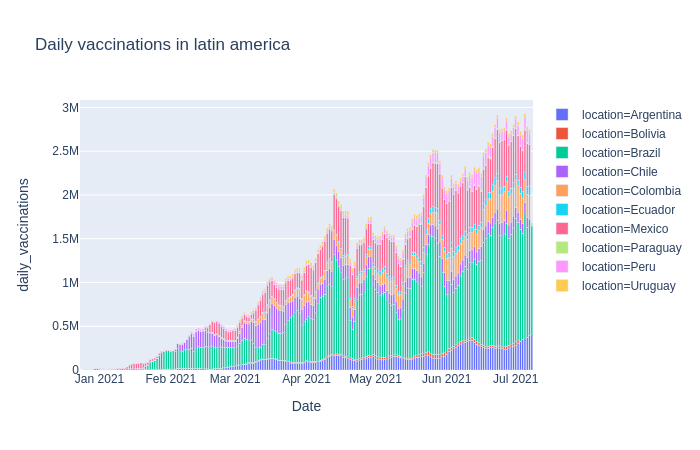

In [74]:
# Plotting daily vaccinations
g1 = px.bar(data_frame = df_la, x = df_la.index , y = 'daily_vaccinations', color = 'location', labels= {'x': 'Date'}, title = 'Daily vaccinations in latin america')
g1.show('png')

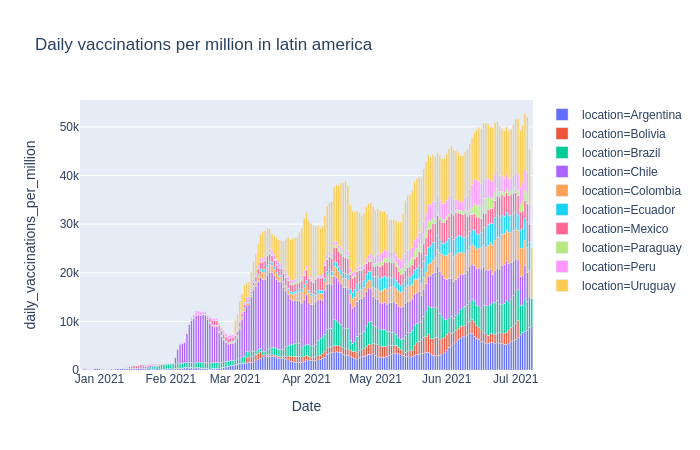

In [75]:
# Plotting daily vaccinations adjusted per population (per million)
g2 = px.bar(data_frame = df_la, x = df_la.index , y = 'daily_vaccinations_per_million', color = 'location', labels= {'x': 'Date'}, title = 'Daily vaccinations per million in latin america')
g2.show('png')

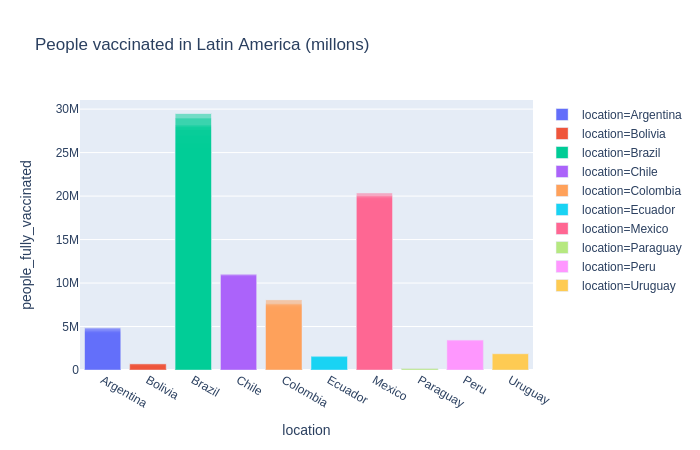

In [76]:
# People fully vaccinated in millions in latin american countries
g3 = px.bar (data_frame = df_la, x = 'location', y = 'people_fully_vaccinated', color = 'location', barmode = 'overlay', title = 'People vaccinated in Latin America (millons)')
g3.show('png')

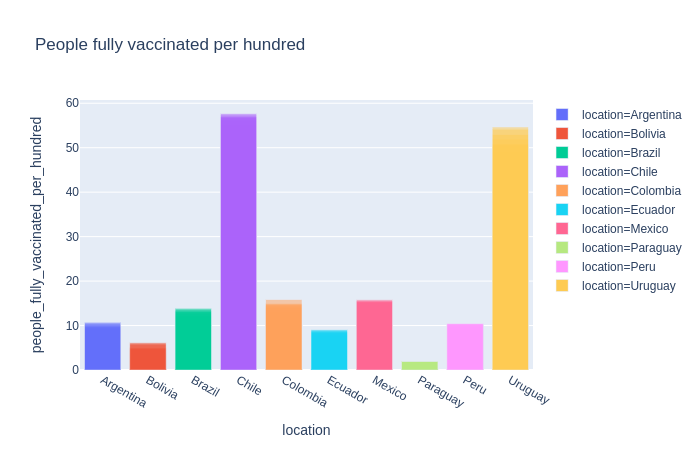

In [77]:
# People fully vaccinated per hundred in latin american countries
g4 = px.bar (data_frame = df_la, x = 'location', y = 'people_fully_vaccinated_per_hundred', color = 'location', barmode = 'overlay', title = 'People fully vaccinated per hundred')
g4.show('png')

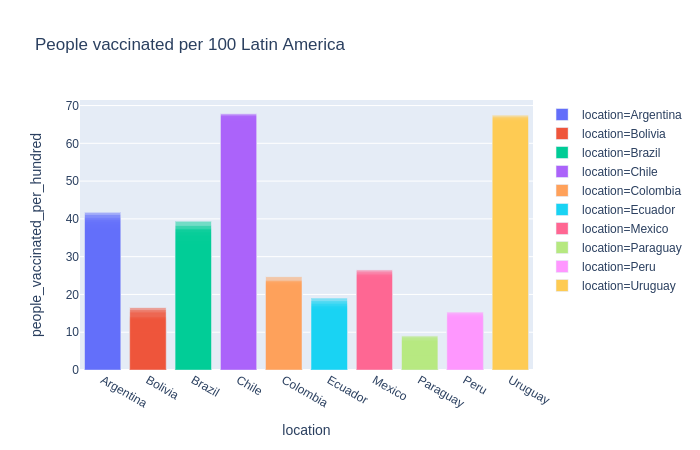

In [78]:
# Plotting the people vaccinated per hundred in latin american countries
g5 = px.bar (data_frame = df_la, x = 'location', y = 'people_vaccinated_per_hundred', color = 'location'  , barmode = 'overlay', title = 'People vaccinated per 100 Latin America')
g5.show('png')

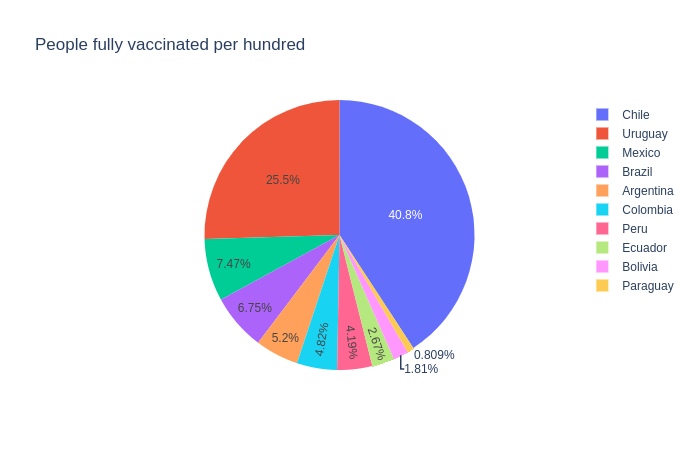

In [79]:
g6 = px.pie(data_frame = df_la, values = 'people_fully_vaccinated_per_hundred', names = 'location', title = 'People fully vaccinated per hundred')
g6.show('png')

In [80]:
# Merging the data frames (df_la_group & df_lat_long) for a plotting purpouse
merge_dfs = pd.merge(df_la_group, df_lat_long, on = 'location' ) 
merge_dfs.head()

,location,day,month,year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,country,latitude,longitude
0,Uruguay,15.25,4.61,2021.00,1926190.83,1239239.88,888995.35,32380.50,31697.86,55.45,35.67,25.59,9125.06,UY,-32.52,-55.77
1,Chile,15.72,3.96,2020.96,10003108.37,5952657.27,4565624.33,121363.96,120030.47,52.33,31.14,23.88,6279.00,CL,-35.68,-71.54
2,Brazil,15.75,3.89,2021.00,34971649.70,24811448.13,11399374.50,608984.33,619022.26,16.45,11.67,5.36,2912.27,BR,-14.24,-51.93
3,Colombia,15.74,4.40,2021.00,6283104.05,5227317.99,2565103.77,130402.54,138246.23,12.35,10.27,5.04,2717.01,CO,4.57,-74.30
4,Mexico,15.67,3.98,2020.96,14598502.66,10799582.22,6405584.86,261514.51,244045.07,11.32,8.38,4.97,1892.82,MX,23.63,-102.55


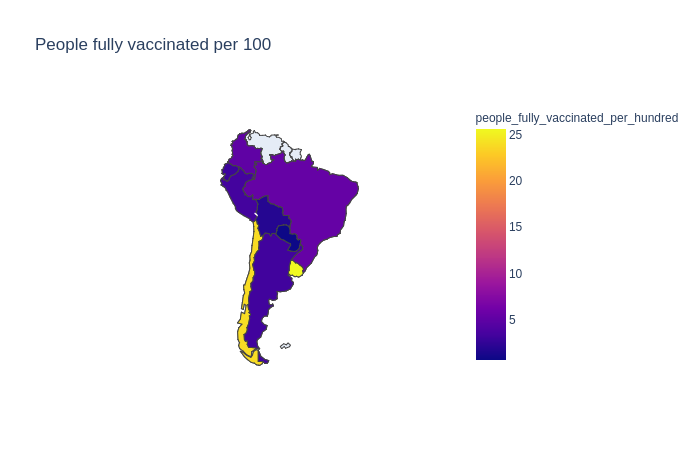

In [81]:
# A choropleth map of the people fully vaccinated in LA 
g7 = px.choropleth (data_frame = merge_dfs, locations = 'location', locationmode = 'country names', 
                    color = 'people_fully_vaccinated_per_hundred', scope = 'south america', title = 'People fully vaccinated per 100')
g7.show('png')

In [82]:
# Grouping the initial data frame by location
df_group =  df.groupby('location', as_index = False).mean().sort_values (by = 'people_fully_vaccinated_per_hundred', ascending = False)
df_group.head()

,location,day,month,year,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
80,Gibraltar,15.99,3.68,2021.00,42626.91,24646.95,21687.41,751.31,466.31,126.52,73.16,64.37,13840.69
70,Falkland Islands,14.72,2.88,2021.00,2360.50,1778.50,1746.00,nan,74.74,67.77,51.06,50.13,21459.42
215,United Arab Emirates,15.41,3.71,2021.00,8427654.26,5557431.29,4541672.14,83951.97,80781.15,85.21,56.19,45.92,8167.61
100,Israel,15.77,4.19,2020.94,7952442.87,4354806.14,3907110.86,54237.19,54285.16,91.88,50.31,45.14,6271.71
38,Cayman Islands,15.54,3.91,2020.97,57520.43,32666.91,26518.94,640.75,488.82,87.52,49.71,40.35,7437.91


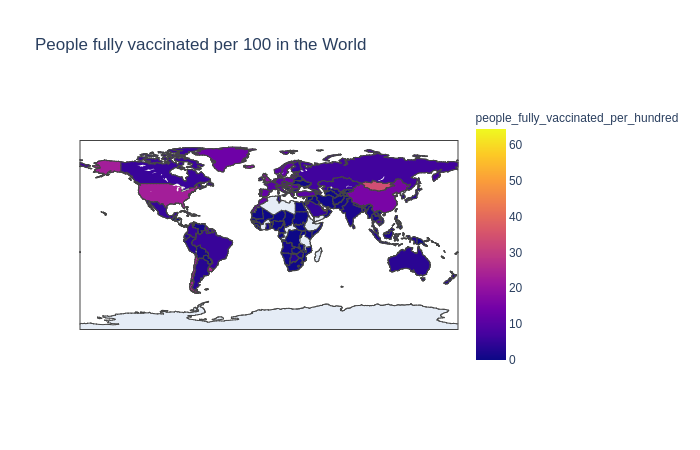

In [83]:
# A choropleth map of the people fully vaccinated in the World
g8 = px.choropleth (data_frame = df_group, locations = 'location', locationmode = 'country names', 
                    color = 'people_fully_vaccinated_per_hundred', scope = 'world', title = 'People fully vaccinated per 100 in the World')
g8.show('png')